Impor Library

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Membaca dan Menampilkan Data

In [43]:
df =pd.read_csv('Data_Negara_HELP (1).csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [45]:
print(df.isnull().sum())

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64


In [46]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Identifikasi Outlier dengan Boxplot

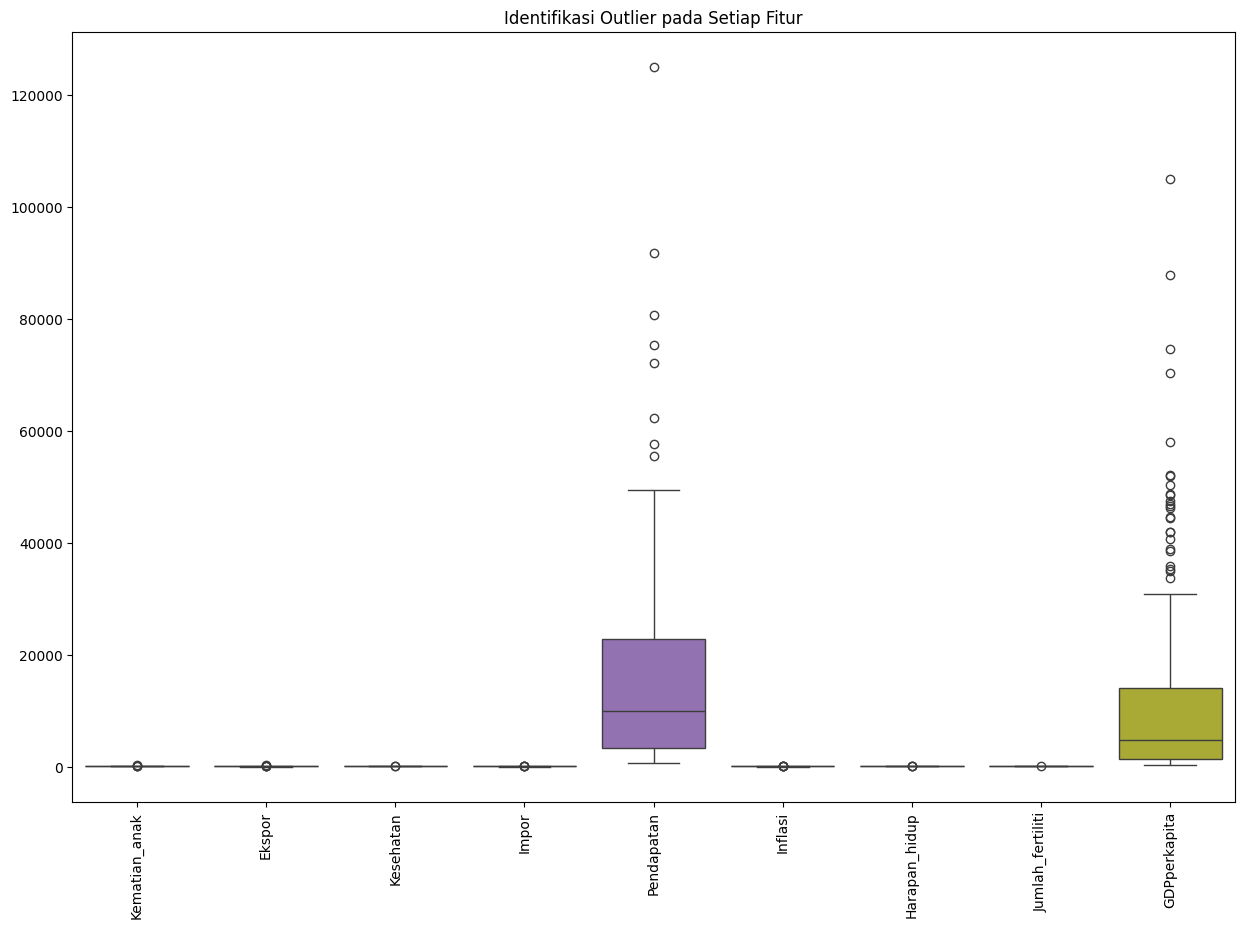

In [47]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(columns=['Negara']))
plt.xticks(rotation=90)
plt.title('Identifikasi Outlier pada Setiap Fitur')
plt.show()

Menghapus Outlier

In [48]:
df_numeric = df.drop(columns=['Negara'])

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[~((df_numeric < lower_bound) |
                      (df_numeric > upper_bound)).any(axis=1)]

df.shape, df_no_outliers.shape

((167, 10), (128, 10))

Multivariate Analysis

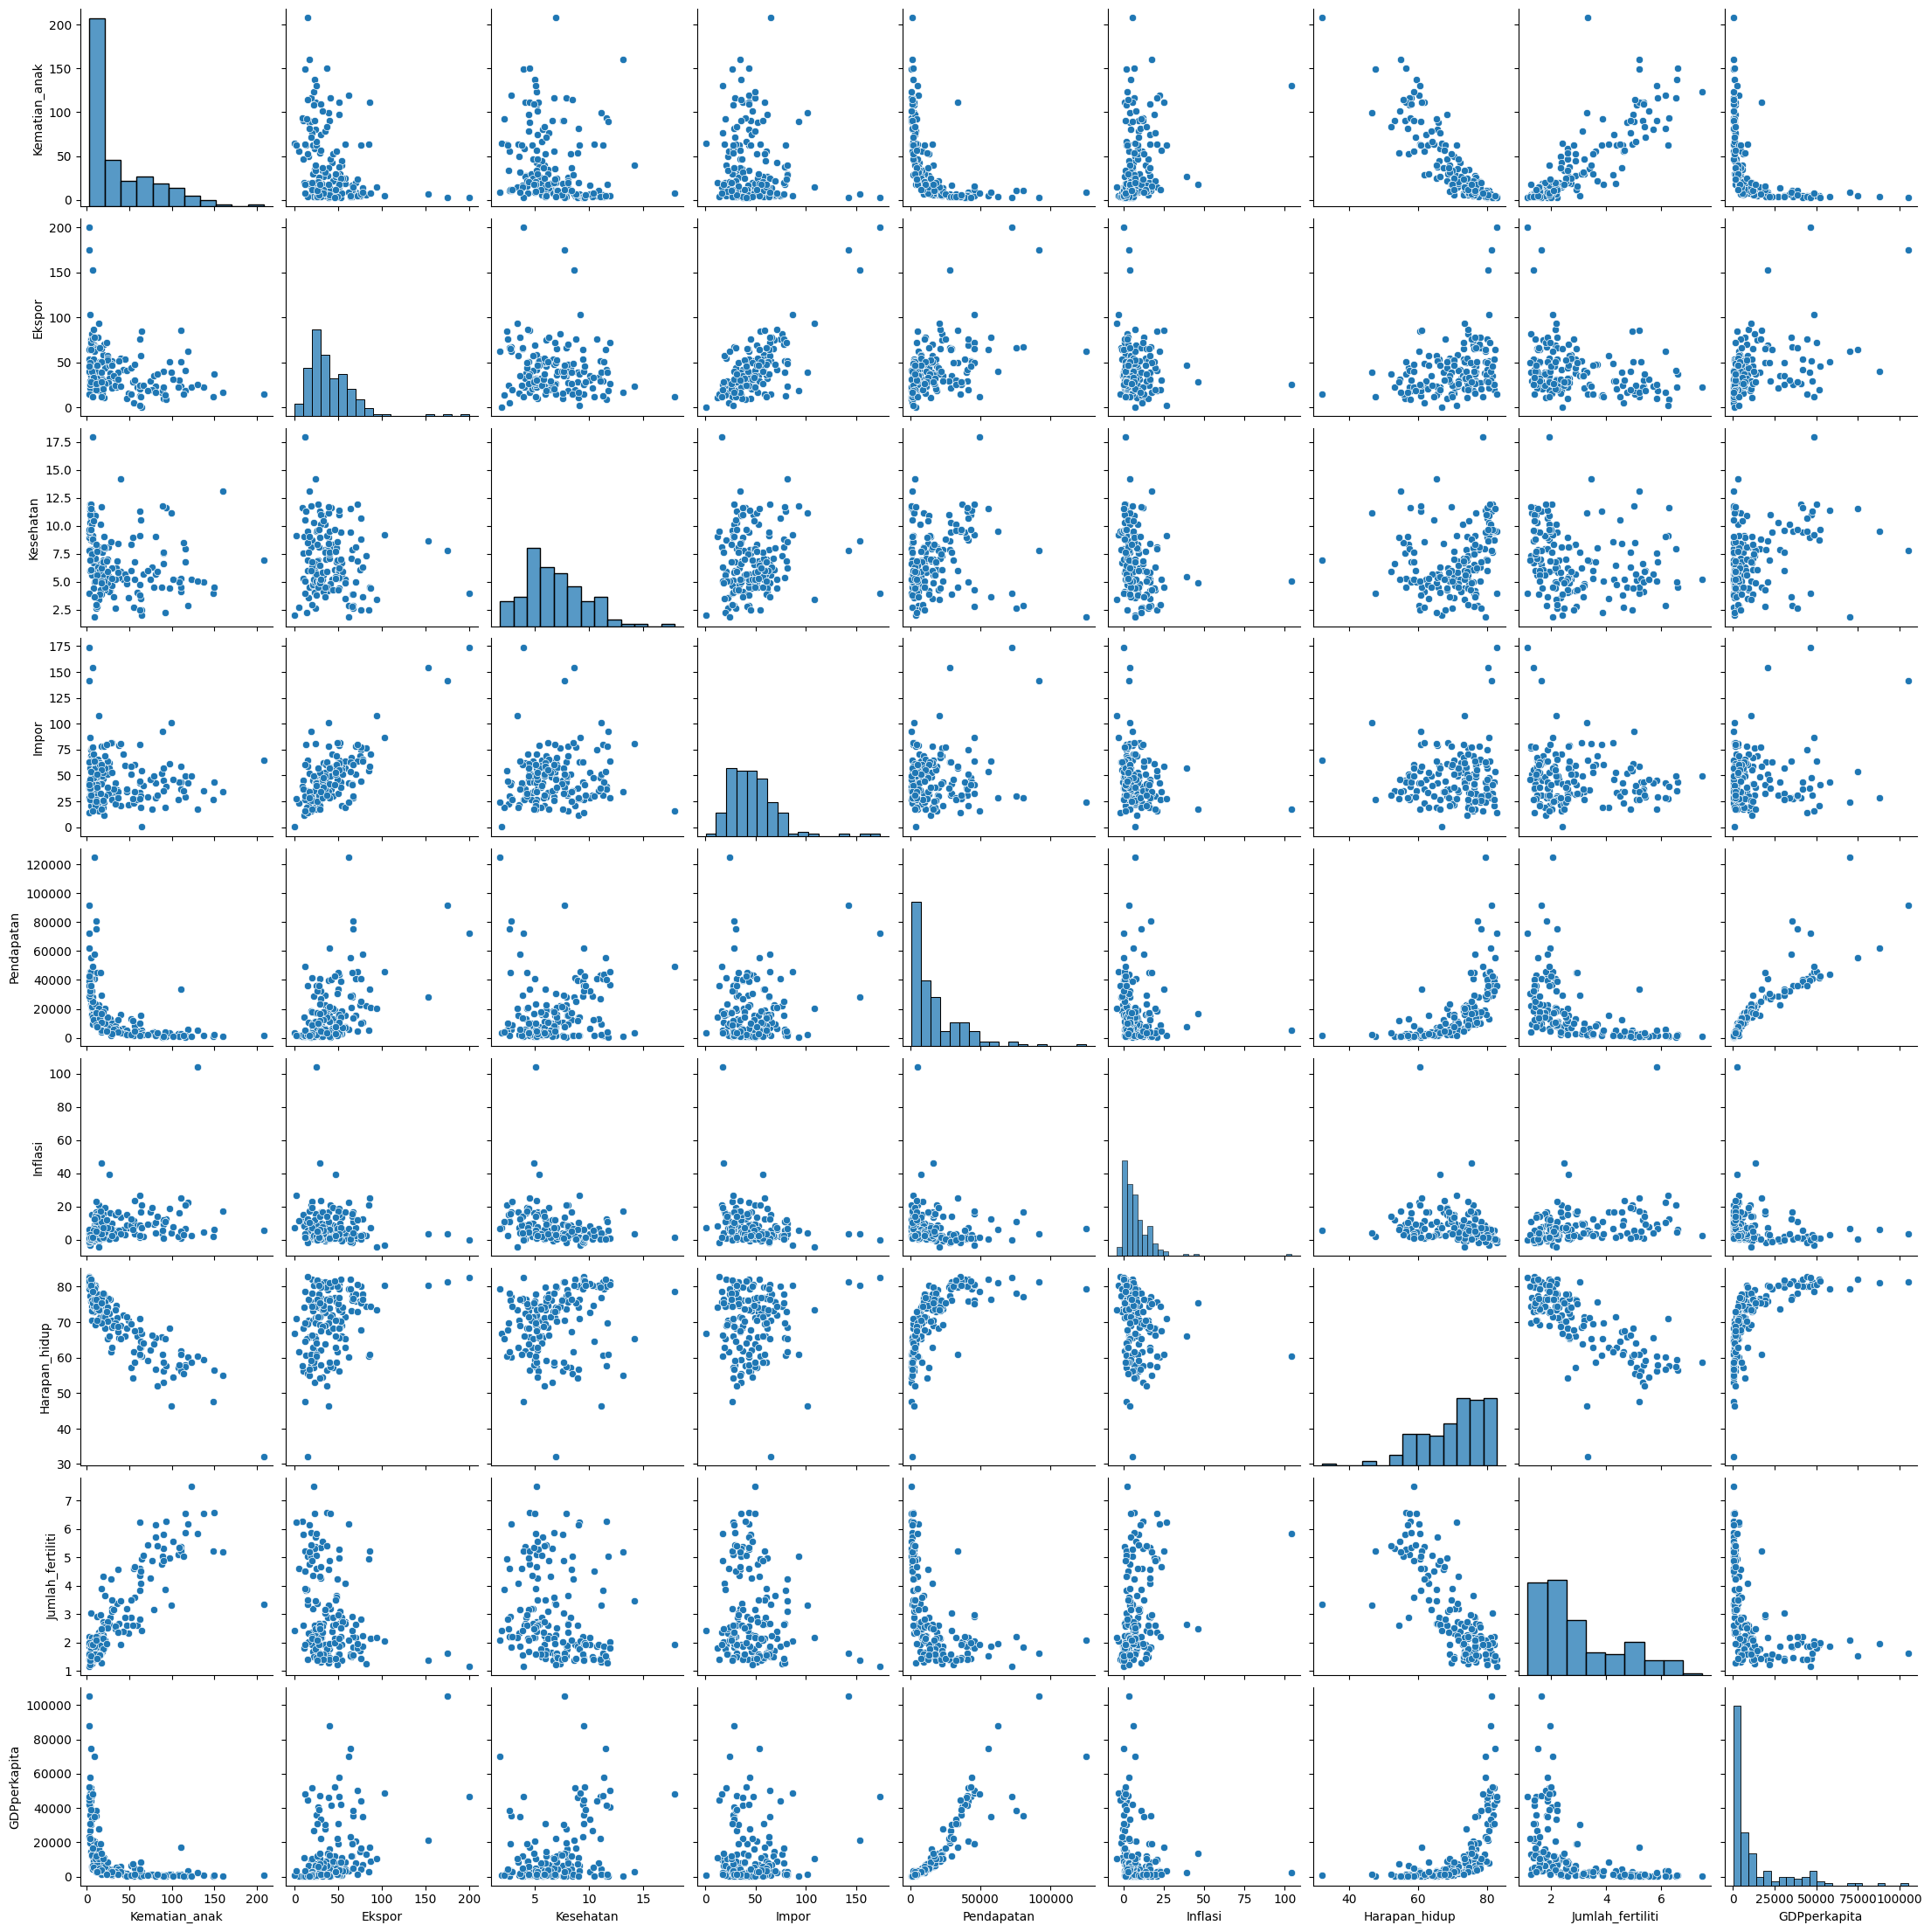

In [49]:
sns.pairplot(data = df)

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

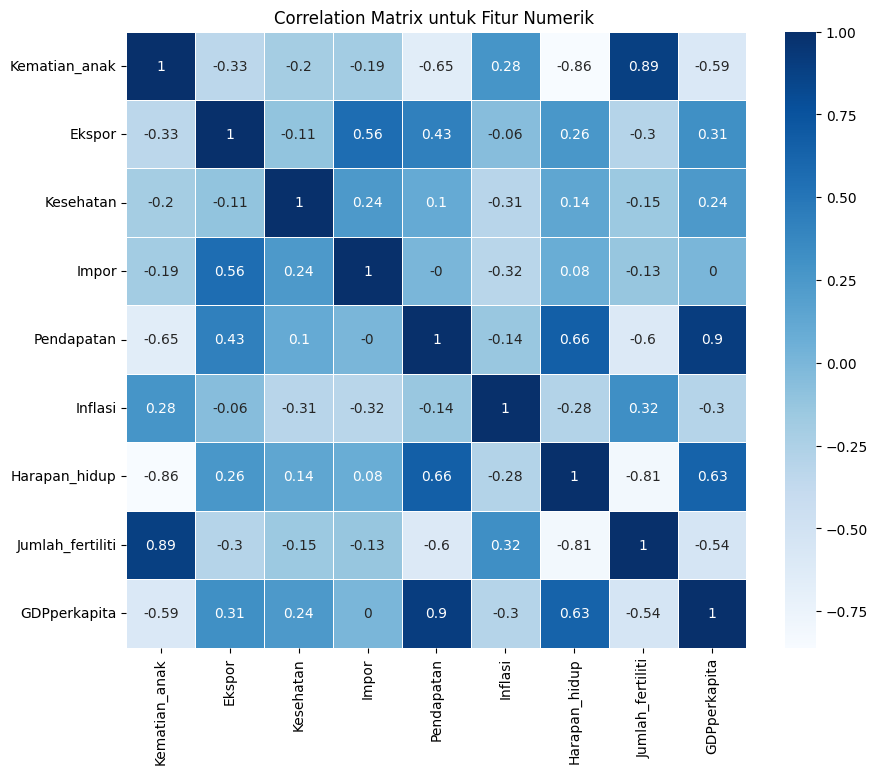

In [50]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_no_outliers.corr(numeric_only=True).round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap="Blues",  linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ")

Normalisasi Data

In [51]:
features = ['Kematian_anak',
            'Ekspor',
            'Kesehatan',
            'Pendapatan',
            'Harapan_hidup',
            'Inflasi',
            'Jumlah_fertiliti',
            'GDPperkapita']

X = df_no_outliers[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Pemilihan Jumlah Klaster dengan Silhouette Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Jumlah Cluster: 2, Silhouette Score: 0.3039958616038549
Jumlah Cluster: 3, Silhouette Score: 0.2675192322736977
Jumlah Cluster: 4, Silhouette Score: 0.2063276077713101
Jumlah Cluster: 5, Silhouette Score: 0.18352940040845422
Jumlah Cluster: 6, Silhouette Score: 0.19964228930969977
Jumlah Cluster: 7, Silhouette Score: 0.21414165086084497
Jumlah Cluster: 8, Silhouette Score: 0.2223282106112131
Jumlah Cluster: 9, Silhouette Score: 0.23215980918229867
Jumlah Cluster: 10, Silhouette Score: 0.23003827519483633


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


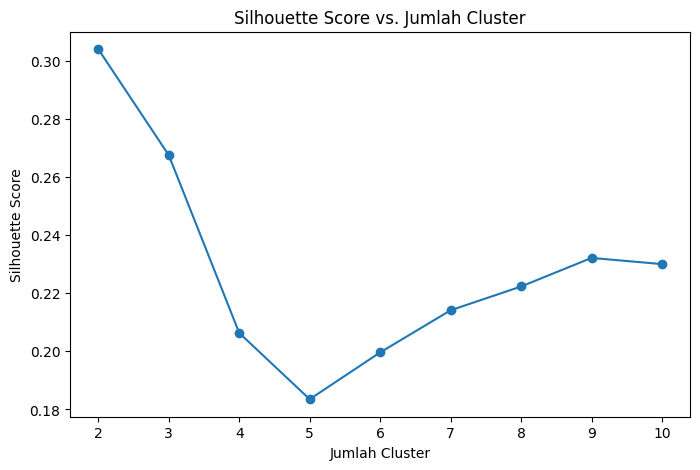

In [52]:
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f'Jumlah Cluster: {n_clusters}, Silhouette Score: {score}')

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()


K-Means Clustering dan Visualisasi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-53-7a09e37e5357>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Cluster'] = kmeans_best.fit_predict(X_scaled)


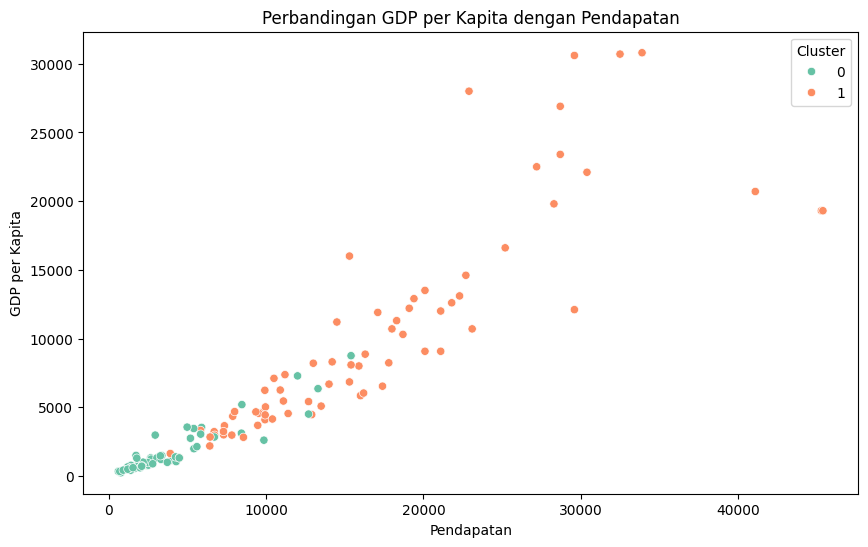

In [53]:
kmeans_best = KMeans(n_clusters=2, random_state=42)
df_no_outliers['Cluster'] = kmeans_best.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_no_outliers['Pendapatan'], y=df_no_outliers['GDPperkapita'], hue=df_no_outliers['Cluster'], palette='Set2')

plt.title('Perbandingan GDP per Kapita dengan Pendapatan')
plt.xlabel('Pendapatan')
plt.ylabel('GDP per Kapita')
plt.show()

In [54]:
cluster_profiles = df_no_outliers.groupby('Cluster')[features].mean()
cluster_profiles

,Kematian_anak,Ekspor,Kesehatan,Pendapatan,Harapan_hidup,Inflasi,Jumlah_fertiliti,GDPperkapita
Cluster,,,,,,,,
0,69.030357,29.489268,5.866786,3875.732143,62.883929,9.218839,4.335893,1746.821429
1,15.286111,43.601389,6.716944,16807.500000,74.991667,5.878194,1.997917,10065.694444


In [55]:
cluster_0_negara = df_no_outliers[df_no_outliers['Cluster'] == 0]['Negara'].tolist()
cluster_1_negara = df_no_outliers[df_no_outliers['Cluster'] == 1]['Negara'].tolist()

print("Negara di Cluster 0:")
print(cluster_0_negara)

print("Negara di Cluster 1:")
print(cluster_1_negara)


Negara di Cluster 0:
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'India', 'Indonesia', 'Iraq', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Togo', 'Tonga', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Yemen', 'Zambia']
Negara di Cluster 1:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Do